In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [9]:
data = pd.read_csv('updated_data.csv')
scaler = MinMaxScaler()
data['Rating'] = scaler.fit_transform(data['Rating'].values.reshape(-1, 1))
data['AvgCost'] = scaler.fit_transform(data['AvgCost'].values.reshape(-1, 1))

##### OPTICS

c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples = 5, eps = 400, silhouette score = 0.060140742720409986
min_samples = 7, eps = 400, silhouette score = -0.13917204733826238


c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
c:\Users\nipun\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


min_samples = 9, eps = 400, silhouette score = -0.13747904166731192
min_samples = 11, eps = 400, silhouette score = -0.14638763153148854
min_samples = 13, eps = 400, silhouette score = -0.0918097219209616
min_samples = 15, eps = 400, silhouette score = -0.08233735443791274
min_samples = 17, eps = 400, silhouette score = -0.07486737484882726
min_samples = 19, eps = 400, silhouette score = -0.12738529539298332
min_samples = 21, eps = 400, silhouette score = 0.005848526001648143
min_samples = 23, eps = 400, silhouette score = 0.023366422635731233
min_samples = 25, eps = 400, silhouette score = -0.019002136253792073
min_samples = 27, eps = 400, silhouette score = -0.028744271164735023
min_samples = 29, eps = 400, silhouette score = -0.06333991763946982
min_samples = 31, eps = 400, silhouette score = -0.06333991763946982
min_samples = 33, eps = 400, silhouette score = -0.06333991763946982
min_samples = 35, eps = 400, silhouette score = -1
min_samples = 37, eps = 400, silhouette score = -1
m

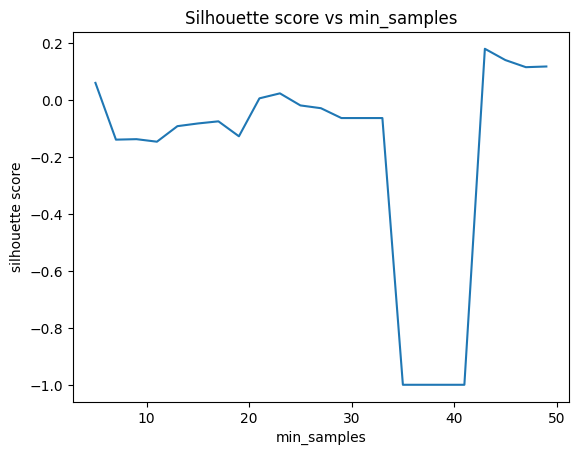

In [10]:
min_samples = range(5, 50, 2)
eps = [400] * len(min_samples)
silhouette_scores = []
davies_bouldin_scores = []
best_score = 0
X = data[['Rating', 'AvgCost']] 
for i in range(len(min_samples)):
    optics = OPTICS(min_samples=min_samples[i], eps=eps[i])
    optics.fit(X)
    labels = optics.labels_
    if len(set(labels)) == 1:
        silhouette_scores.append(-1)
    else:
        silhouette_scores.append(silhouette_score(X, labels))
    print('min_samples = {}, eps = {}, silhouette score = {}'.format(min_samples[i], eps[i], silhouette_scores[i]))

best_score = max(silhouette_scores)
best_score_index = silhouette_scores.index(best_score)
best_min_samples = min_samples[best_score_index]
best_eps = eps[best_score_index]
print('best min_samples = {}, best eps = {}, best silhouette score = {}'.format(best_min_samples, best_eps, best_score))
plt.plot(min_samples, silhouette_scores)
plt.xlabel('min_samples')
plt.ylabel('silhouette score')
plt.title('Silhouette score vs min_samples')
plt.show()

In [11]:
optics = OPTICS(min_samples=best_min_samples, eps=best_eps)
optics.fit(X)
labels = optics.labels_
print('Number of clusters: {}'.format(len(set(labels)) - (1 if -1 in labels else 0)))
print('Silhouette score: {}'.format(silhouette_score(X, labels)))
print('Davies-Bouldin score: {}'.format(davies_bouldin_score(X, labels)))
data['op_cluster'] = labels

Number of clusters: 1
Silhouette score: 0.17991449154123115
Davies-Bouldin score: 3.4597588961708365


<AxesSubplot:xlabel='Rating', ylabel='AvgCost'>

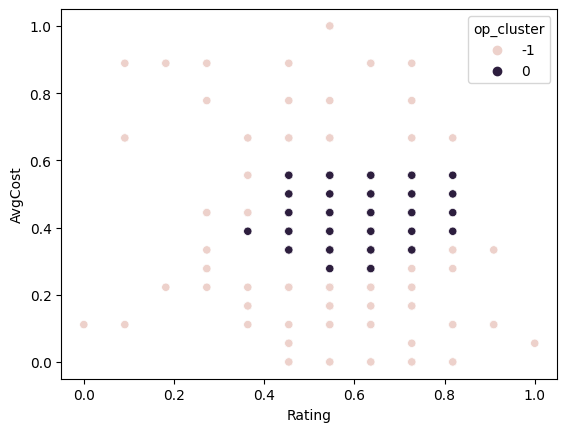

In [12]:
sns.scatterplot(x='Rating', y='AvgCost', hue='op_cluster', data=data)